# Financial Analysis

The idea here is to start with an analysis of the market data. So we start by observing the market by many visualisation and details.

## Initialisation

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd

## Reading of data

In [96]:
stock = pd.read_csv('data/nasdaq/AAPL.csv', index_col=0)
stock = stock[-1500:]
print(stock.index)
stock.index = pd.to_datetime(stock.index, format="%d-%m-%Y")
print(stock.index)
stock.head()

Index(['11-11-2015', '12-11-2015', '13-11-2015', '16-11-2015', '17-11-2015',
       '18-11-2015', '19-11-2015', '20-11-2015', '23-11-2015', '24-11-2015',
       ...
       '13-10-2021', '14-10-2021', '15-10-2021', '18-10-2021', '19-10-2021',
       '20-10-2021', '21-10-2021', '22-10-2021', '25-10-2021', '26-10-2021'],
      dtype='object', name='Date', length=1500)
DatetimeIndex(['2015-11-11', '2015-11-12', '2015-11-13', '2015-11-16',
               '2015-11-17', '2015-11-18', '2015-11-19', '2015-11-20',
               '2015-11-23', '2015-11-24',
               ...
               '2021-10-13', '2021-10-14', '2021-10-15', '2021-10-18',
               '2021-10-19', '2021-10-20', '2021-10-21', '2021-10-22',
               '2021-10-25', '2021-10-26'],
              dtype='datetime64[ns]', name='Date', length=1500, freq=None)


,Low,Open,Volume,High,Close,Adjusted Close
Date,,,,,,
2015-11-11,28.802500,29.092501,180872000,29.355000,29.027500,26.767387
2015-11-12,28.912500,29.065001,130102400,29.205000,28.930000,26.677477
2015-11-13,28.067499,28.799999,183249600,28.892500,28.084999,25.898272
2015-11-16,27.750000,27.844999,152426800,28.559999,28.545000,26.322456
2015-11-17,28.330000,28.730000,110467600,28.762501,28.422501,26.209492


## First Visualisation

<AxesSubplot:title={'center':'Open Price'}, xlabel='Date'>

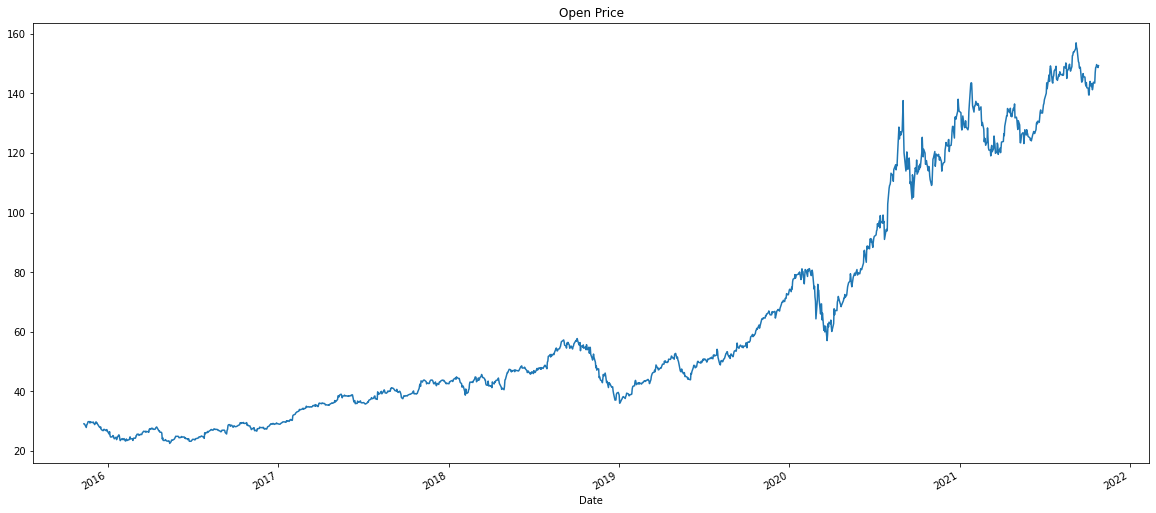

In [97]:
stock['Open'].plot(label="AAPL",figsize=(20,9), title='Open Price')

<AxesSubplot:title={'center':'Open Price'}, xlabel='Date'>

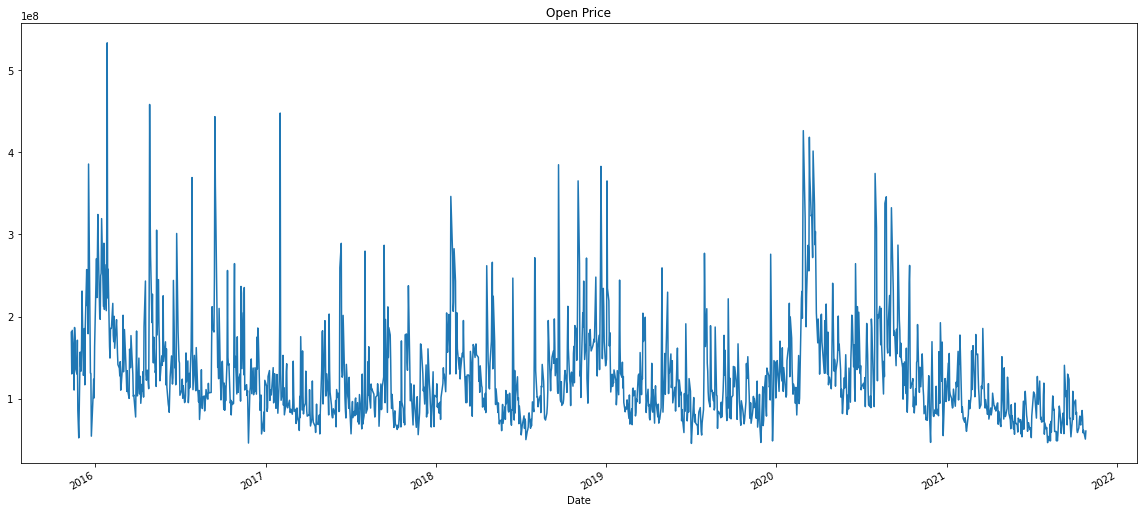

In [98]:
stock['Volume'].plot(figsize=(20,9), title='Open Price')

<AxesSubplot:title={'center':'Total Traded Price'}, xlabel='Date'>

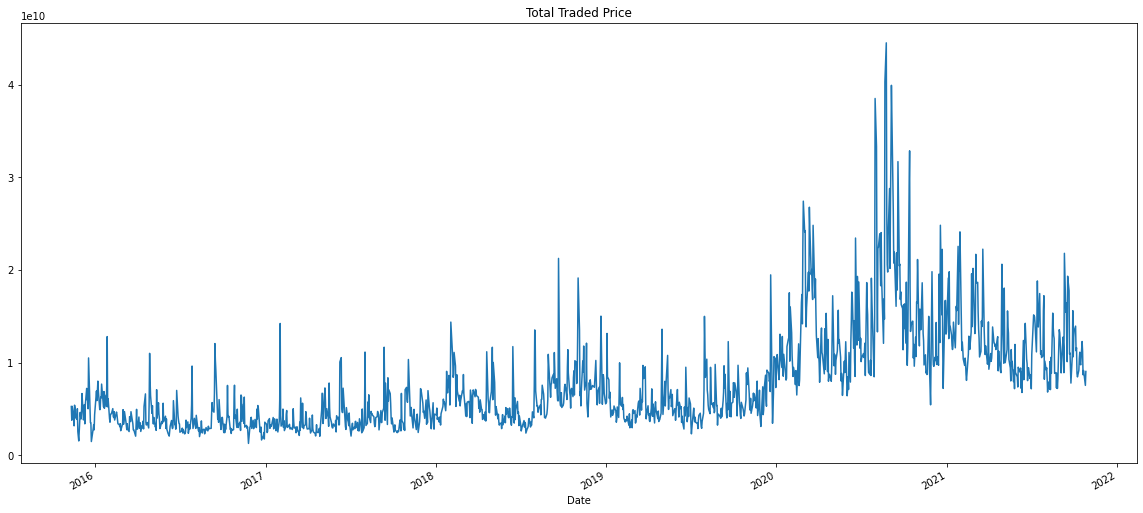

In [99]:
stock['Total Traded'] = stock['Volume']*stock['Open']
stock['Total Traded'].plot(figsize=(20,9), title='Total Traded Price')

<AxesSubplot:xlabel='Date'>

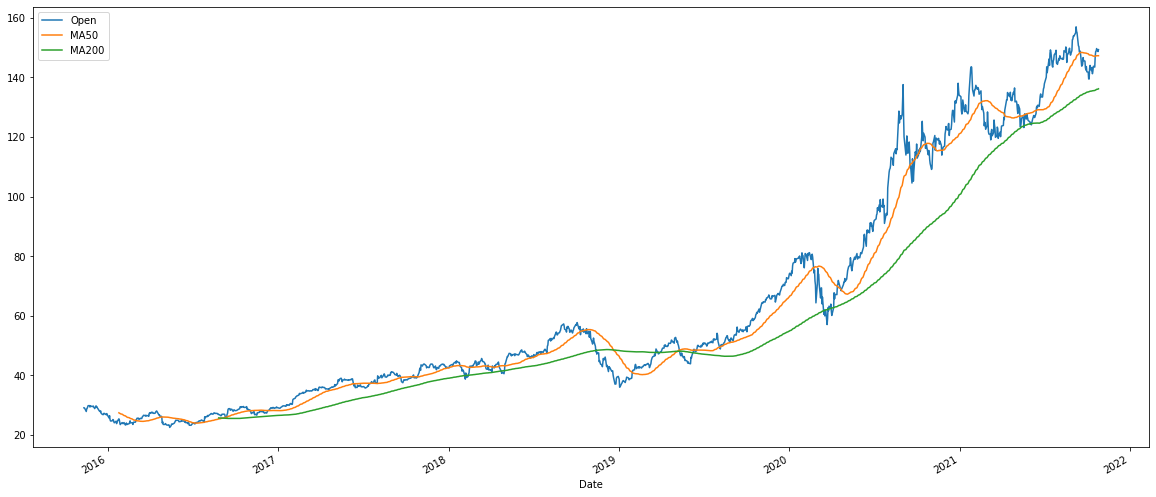

In [100]:
stock['MA50'] = stock['Open'].rolling(50).mean()
stock['MA200'] = stock['Open'].rolling(200).mean()
stock[['Open','MA50','MA200']].plot(figsize=(20,9))

[]

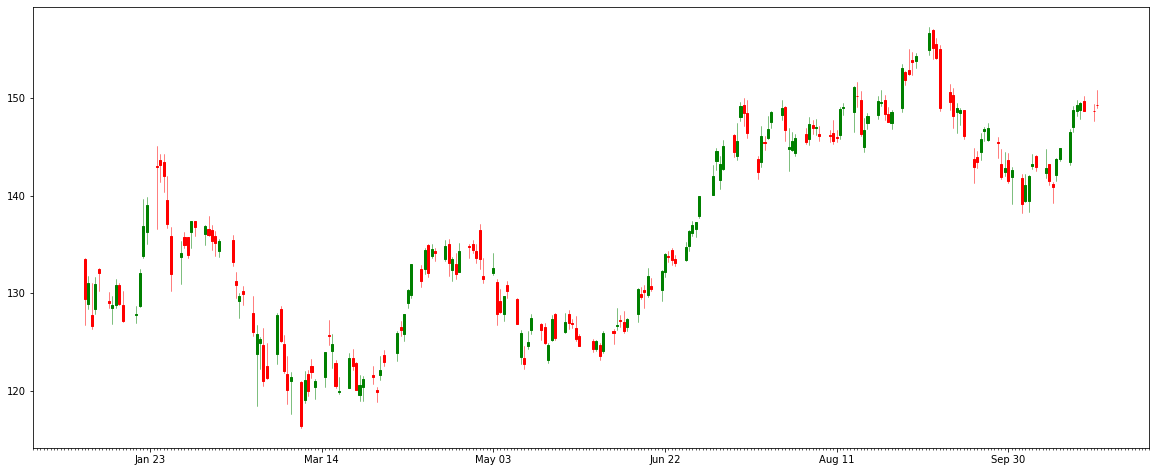

In [125]:
from mplfinance.original_flavor import candlestick_ohlc

from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY


stock_reset = stock["2021":].reset_index()

stock_reset['date_ax'] = stock_reset['Date'].apply(lambda date: date2num(date))
stock_values = [tuple(val) for val in stock_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
weekFormatter = DateFormatter("%b %d")
dayFormatter = DateFormatter('%d')
fig, ax = plt.subplots()
fig.set_figwidth(20)
fig.set_figheight(9)
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, stock_values, width=0.6, colorup='g', colordown='r',)

plt.plot()